In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [3]:
try:    
    from google.colab import drive
    drive.mount('/content/drive/', force_remount= True)
except ImportError as e:
    print("error")
    pass

Mounted at /content/drive/


In [14]:
%cd '/content/drive/MyDrive/uni-mannheim/data Mining II/DMC'

/content/drive/MyDrive/uni-mannheim/data Mining II/DMC


In [15]:
# configure plotly lib to work on browser
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [16]:
# helper function
def df_to_plotly(df):
    return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
#import plotly.graph_objects as go

In [35]:
items_df = pd.read_csv('items.csv', sep='|')
orders_df = pd.read_csv('orders.csv', sep='|')
cat_hierarchy_df = pd.read_csv('category_hierarchy.csv', sep='|')

In [18]:
display(items_df.head())
display(items_df.tail())

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"
32775,16083,1111,4,3,485,3,16,"[3900, 3901, 3905, 3902, 3903, 3910, 2473, 2470]"


In [19]:
items_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
itemID,32776.0,NaN,NaN,NaN,16387.5,9461.760548,0.0,8193.75,16387.5,24581.25,32775.0
brand,32776.0,NaN,NaN,NaN,702.776574,432.774074,-1.0,322.0,648.0,1073.0,1513.0
feature_1,32776.0,NaN,NaN,NaN,6.451062,2.744884,-1.0,4.0,6.0,10.0,10.0
feature_2,32776.0,NaN,NaN,NaN,0.817946,0.778284,0.0,0.0,1.0,1.0,3.0
feature_3,32776.0,NaN,NaN,NaN,440.280388,132.566994,-1.0,453.0,491.0,509.0,538.0
feature_4,32776.0,NaN,NaN,NaN,0.804735,1.354669,-1.0,0.0,0.0,3.0,4.0
feature_5,32776.0,NaN,NaN,NaN,74.689285,57.621143,-1.0,17.0,66.0,126.0,190.0
categories,25988,12191,[1807],346,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
items_df[items_df.isna().any(axis=1)]

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
1,28640,1366,10,1,537,0,101,NaN
5,32122,5,4,1,491,0,66,NaN
16,366,1366,10,1,537,0,101,NaN
18,4119,167,4,1,466,0,-1,NaN
20,14612,1277,4,1,491,0,66,NaN
...,...,...,...,...,...,...,...,...
32744,14185,1246,6,2,536,0,46,NaN
32747,19077,613,10,2,507,0,17,NaN
32748,29565,1284,4,1,474,3,-1,NaN
32764,21234,1366,10,1,537,0,101,NaN


In [21]:
print("Shape of the raw data:", items_df.shape)
print("Columns (Features) of the raw data:\n", items_df.axes[1])
print("Number of unique items:", np.unique(items_df['itemID']).shape)

Shape of the raw data: (32776, 8)
Columns (Features) of the raw data:
 Index(['itemID', 'brand', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'categories'],
      dtype='object')
Number of unique items: (32776,)


In [22]:
mask = pd.notnull(items_df['itemID'])
print("Number of missing  itemIDs", items_df.shape[0] - np.sum(mask))

Number of missing  itemIDs 0


In [23]:
# check if there is nan values
count_nan = items_df.isna().sum().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: 6788


In [24]:
# where are these missing values
for col_name in items_df.axes[1]:
    print(f'{col_name} has {items_df[col_name].isna().sum()} nan values')

itemID has 0 nan values
brand has 0 nan values
feature_1 has 0 nan values
feature_2 has 0 nan values
feature_3 has 0 nan values
feature_4 has 0 nan values
feature_5 has 0 nan values
categories has 6788 nan values


In [25]:
# correlation
configure_plotly_browser_state() # musst be called in each cell uses plotly
dfNew = items_df.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.show()

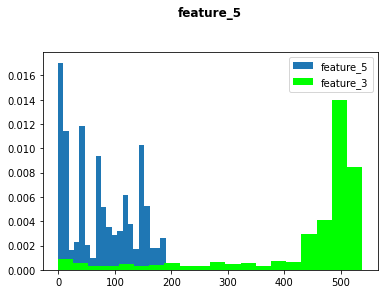

In [26]:

	
np.random.seed(10**7)
n_bins = 20
	
#colors = ['lime'] #, 'blue', 'lime'

plt.hist(items_df['feature_5'], n_bins, density = True,
		histtype ='bar',
		label = "feature_5")
plt.hist(items_df['feature_3'], n_bins, density = True,
		histtype ='bar',
        color = ['lime'],
		label = "feature_3")

plt.legend(prop ={'size': 10})

plt.title('feature_5\n\n',
		fontweight ="bold")

plt.show()

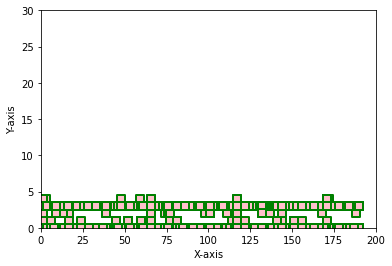

In [28]:
# there was some corr. btw. 3&1 and 5&4
plt.scatter(items_df['feature_3'], items_df['feature_1'], c ="pink",
			linewidths = 2,
			marker ="s",
			edgecolor ="green",
			s = 80)

plt.xlim(0, 200)
plt.ylim(0, 30)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
# plots tell nothing so far

Orders 

In [36]:
display(orders_df.head())
display(orders_df.tail())
print("Shape of the raw data:", orders_df.shape)
print("Columns (Features) of the raw data:\n", orders_df.axes[1])
print("Number of unique users:", np.unique(orders_df['userID']).shape)
print("Number of unique items:", np.unique(orders_df['itemID']).shape)
print("Number of unique orders:", np.unique(orders_df['order']).shape)

,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


,date,userID,itemID,order
1071533,2021-01-31,22114,29567,2
1071534,2021-01-31,22114,21068,1
1071535,2021-01-31,10900,18270,1
1071536,2021-01-31,17894,31265,5
1071537,2021-01-31,25974,17983,1


Shape of the raw data: (1071538, 4)
Columns (Features) of the raw data:
 Index(['date', 'userID', 'itemID', 'order'], dtype='object')
Number of unique users: (46138,)
Number of unique items: (31756,)
Number of unique orders: (51,)


In [37]:
for col_name in orders_df.axes[1]:
    print(f'{col_name} has {orders_df[col_name].isna().sum()} nan values')

date has 0 nan values
userID has 0 nan values
itemID has 0 nan values
order has 0 nan values


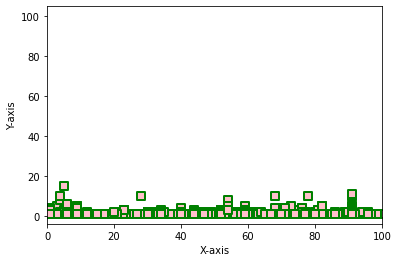

In [38]:

plt.scatter(orders_df['itemID'], orders_df['order'], c ="pink",
			linewidths = 2,
			marker ="s",
			edgecolor ="green",
			s = 80)

"""plt.scatter(items_df['feature_3'], items_df['itemID'], c ="yellow",
			linewidths = 2,
			marker ="^",
			edgecolor ="red",
			s = 200)"""
plt.xlim(0, 100)
#plt.ylim(-1, 1)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
# nothing obv.

In [39]:
orders_df['date'] = pd.to_datetime(orders_df['date']) 
orders_df_copy = orders_df
orders_df.sort_values(by='date', inplace=True)

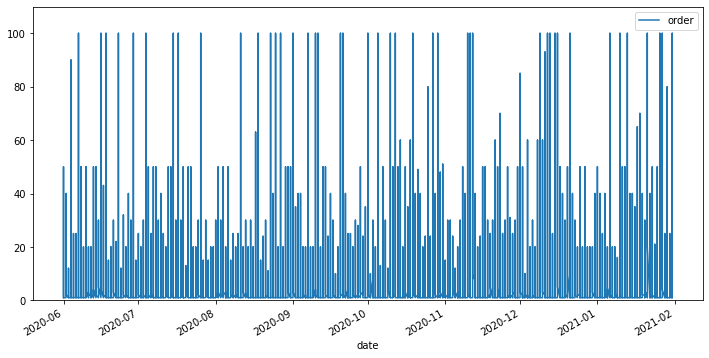

In [40]:
ax = orders_df.plot(x='date', y='order', figsize=(12,6))
plt.ylim(0,110)
plt.show()
# could be a pattern, will examine some months individually

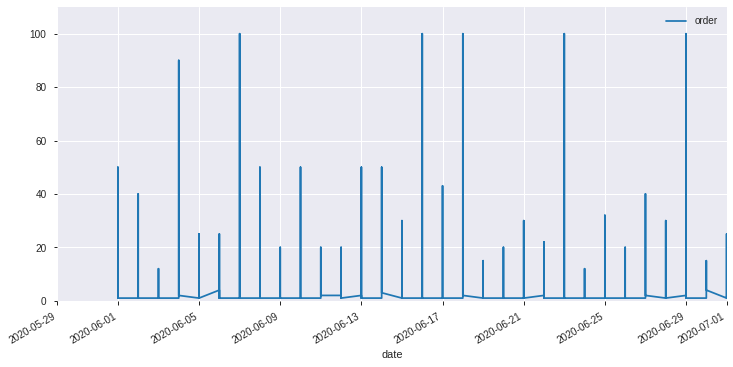

In [75]:
ax = orders_df.plot(x='date', y='order', figsize=(12,6))
plt.xlim('2020-05-29', '2020-07')
plt.ylim(0,110)
plt.show()
# most of the orders (day-nr., day-name, value):
# (1, M, 55), (4,Thur, 95), (7, Sa, 101), (16, Tue, 101), (18, thur, 101), (23, Tue, 101), (29, M, 101)
# in germany, june-2020 holidays are in 1-06 New Year's Day
#06-06 three King's Day in baden-Wür, bavaria and saxony anhalt -> nothing obvious, contine with the next month


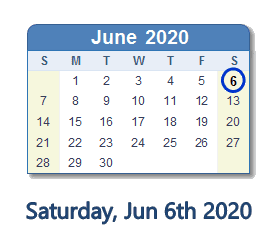

In [80]:
from IPython.display import Image
Image('june-6-2020.png')

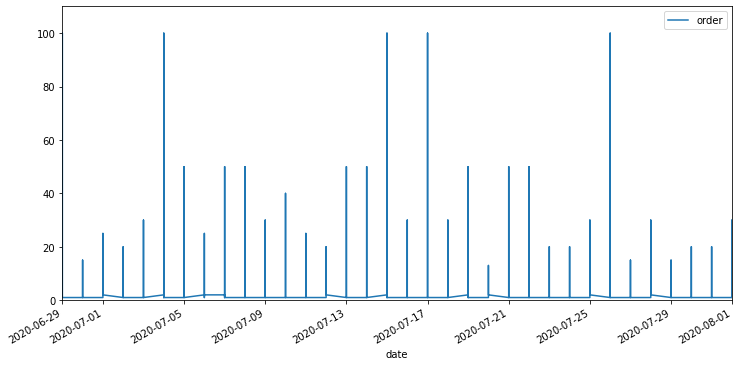

In [41]:
ax = orders_df.plot(x='date', y='order', figsize=(12,6))
plt.xlim('2020-06-29', '2020-08')
plt.ylim(0,110)
plt.show()
# 4, 16, 18, 26 have highst order-amount

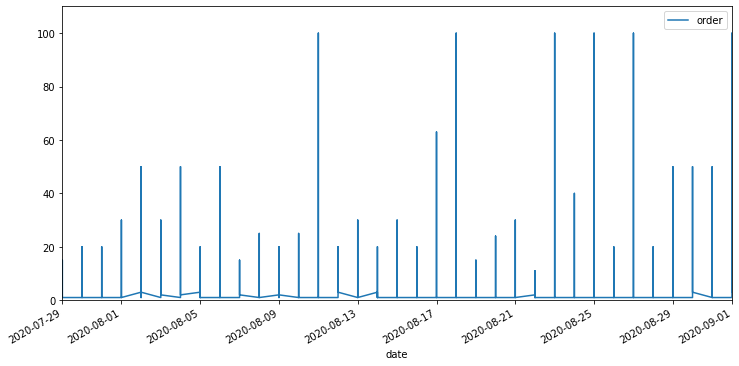

In [42]:
ax = orders_df.plot(x='date', y='order', figsize=(12,6))
plt.xlim('2020-07-29', '2020-09')
plt.ylim(0,110)
plt.show()
# 10, 18, 23, 25 have high order-amount

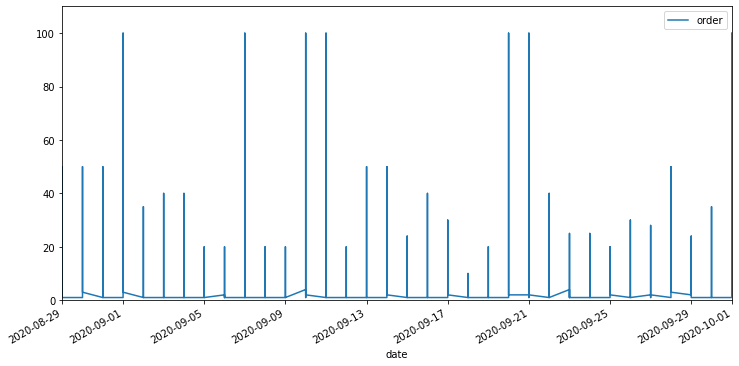

In [43]:
ax = orders_df.plot(x='date', y='order', figsize=(12,6))
plt.xlim('2020-08-29', '2020-10')
plt.ylim(0,110)
plt.show()
# 1, 8, 11, 12, 20,21, have high order-amount
# from prev. plot no specific pattern was noticed.

In [20]:
display(cat_hierarchy_df.head())
display(cat_hierarchy_df.tail())
print("Shape of the raw data:", cat_hierarchy_df.shape)
print("Columns (Features) of the raw data:\n", cat_hierarchy_df.axes[1])

,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


,category,parent_category
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898
4331,4299,3898


Shape of the raw data: (4332, 2)
Columns (Features) of the raw data:
 Index(['category', 'parent_category'], dtype='object')
